# Analyzing MO Results!

In [1]:
# Load libraries
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

from utils_analysis import plot_interactive, hypervolume, sparsity

Notes:

- iter_<>.json files corresponds to (iter + 1). 
- There is no overlap between the the different executions.

Objectives:
- Get CCS the points and compute the Hypervolume and sparsity

In [25]:
# res_dir = "ols_no_reuse/outputs/seed1234/"
res_dir = "ols_no_reuse/outputs/seed1254/"

In [26]:
# Go to execution directory 
try:
    os.chdir("../../results/greenlight/" + res_dir)
except:
    try:
        os.chdir("../../../" + res_dir)
    except:
        pass
    pass
os.getcwd()

'C:\\Users\\goust\\Documents\\EARLY_YEARS\\Master\\TU Delft\\Thesis_project\\results\\greenlight\\ols_no_reuse\\outputs\\seed1254'

In [27]:
# Get all iter filenames
jsons = glob.glob('*/iters/iter_[0-9]*.json')

result_files = []
for idx in range(1,500):
    try:
        f = [i for i in jsons if f"iter_{idx}.json" in i][-1]
    except:
        break
    result_files.append(f)
tot_iterations = idx - 1
print(f"Execution contains {tot_iterations} iterations.")

Execution contains 98 iterations.


In [28]:
# Read last iteration and plot ccs
final_json = json.load(open(result_files[-1]))

In [36]:
# Plot interactive
fig = plot_interactive(final_json["ccs"], size=[1000, 600])

In [42]:
from ipywidgets import IntSlider, interact, FloatSlider

@interact(iteration = IntSlider(min = 0, max = tot_iterations))
def execute(iteration):
    final_json = json.load(open(result_files[iteration]))
    for obj in list(itertools.permutations([0, 1, 2], 2)):
        if obj[0] <= obj[1]: continue

        plot_interactive(final_json["ccs"], obj=obj, size=[500, 300])
        
# execute(t=tot_iterations-1)

interactive(children=(IntSlider(value=0, description='iteration', max=98), Output()), _dom_classes=('widget-in…

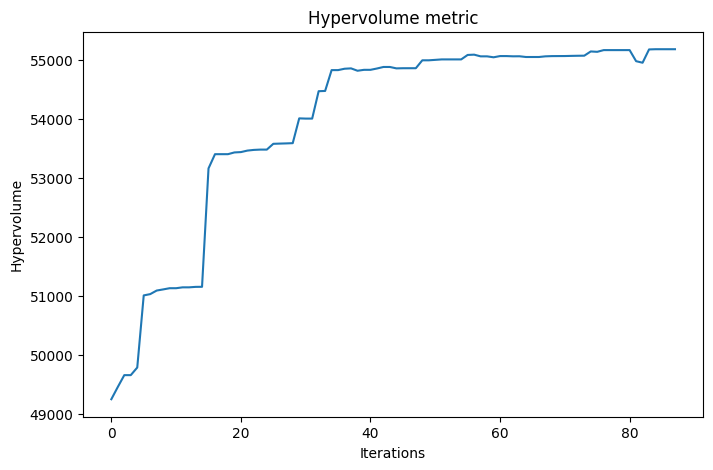

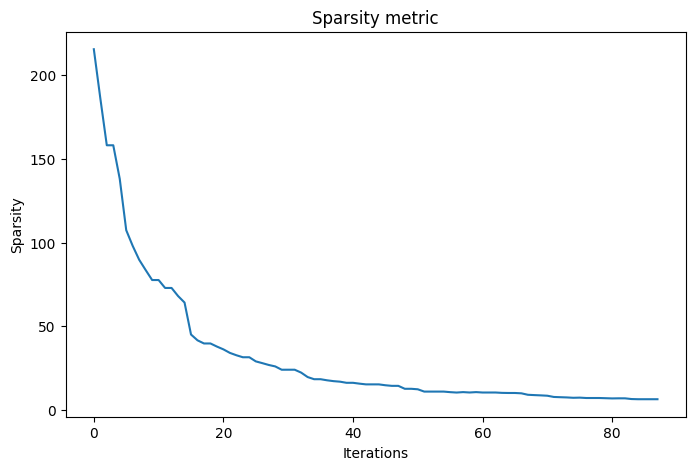

Final Hypervolume: 55186.89559610035
Final Sparsity: 6.325232397371045


In [34]:
# Compute the Hypervolume and sparsity metrics
HV = []
sp = []
for it in range(10,tot_iterations):
    json_file = json.load(open(result_files[it]))
    ccs_arr = np.array(json_file["ccs"])
    ccs_arr += 100
    hv = hypervolume(np.ones(3)*100, ccs_arr)
    spar = sparsity(ccs_arr)
    HV.append(hv)
    sp.append(spar)
    
plt.plot(HV, label="Hypervolume")
plt.title("Hypervolume metric")
plt.ylabel("Hypervolume")
plt.xlabel("Iterations")
plt.show()

plt.plot(sp, label="Sparsity")
plt.title("Sparsity metric")
plt.ylabel("Sparsity")
plt.xlabel("Iterations")
plt.show()

print(f"Final Hypervolume: {HV[-1]}")
print(f"Final Sparsity: {sp[-1]}")

Seed 1234:
* Final Hypervolume: 51001.37465427368
* Final Sparsity: 18.68394264067051

Seed 1244:
* Final Hypervolume: 51439.89789642078
* Final Sparsity: 7.958373256709881

Seed 1254:
* Final Hypervolume: 55186.89559610035
* Final Sparsity: 6.325232397371045


# Practical examples
- Check the final costs
- Check the actions